# Importing libraries

In [119]:
import pandas as pd
import numpy as np
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,2)

# Loading Data

In [2]:
uploaded1 = files.upload()

Saving btc_raw_24.csv to btc_raw_24.csv


In [3]:
uploaded2 = files.upload()

Saving btc_raw_25.csv to btc_raw_25.csv


In [4]:
data_raw_24 = pd.read_csv('btc_raw_24.csv')
data_raw_25 = pd.read_csv('btc_raw_25.csv')

In [5]:
data_raw_24.index = data_raw_24['Date']
data_raw_24.drop(['Date'],axis=1,inplace=True)
data_raw_24.index = pd.to_datetime(data_raw_24.index)

In [29]:
data_raw_25.index = data_raw_25['Date']
data_raw_25.drop(['Date'],axis=1,inplace=True)
data_raw_25.index = pd.to_datetime(data_raw_25.index)

# Functions

In [120]:
# Function to plot data for EDA
sns.set_style("darkgrid")
colors=['#746AB0','#784421','#800080','#808000']
def plot(df,features,a,b,c,xlim=(0,None),ylim=(0,None)):
  
  if b==1:
    # KDE histogram plot and scatter plot
    for i in features:
      fig, axes = plt.subplots(1, 2, figsize=(20, a), sharey=True)
      ax = sns.histplot(ax=axes[0],y=df[i],kde=True,color=colors[c])
      ax.set(xlim=xlim)
      ax.set(ylim=ylim)      
      sns.scatterplot(ax=axes[1],data=df,y=i,x='next_day_BTC_price',s=50,color = colors[c])
      plt.show()
    # Correlation Plot
    plt.figure(figsize=(20,a))
    cor = df.corr(method= 'pearson').loc[features,:].sort_values(by=features,axis=1)
    sns.heatmap(cor, annot=True,cmap='tab10',square=True,cbar=False,annot_kws={"fontsize":12},linewidths=1, linecolor='black')
    plt.title('Correlations',fontsize=15)
    plt.show()
    # Plot to comparitve analysis
    for i in features:
      fig, (ax1, ax2) = plt.subplots(2)
      fig.set_figheight(2*a)
      fig.set_figwidth(20)
      ax1.plot(df.index,df['next_day_BTC_price'],color='black')
      ax1.set_title('Next_day_BTC_price VS '+ str(i), fontsize=15)
      ax2.plot(df.index,df[i],color=colors[c])
      df.plot(kind='kde',y=i,color=colors[c])
      plt.show()
  
  # KDE histogram plot and scatter plot
  elif b==2:
    for i in features:
      fig, axes = plt.subplots(1, 2, figsize=(20, a), sharey=True)
      ax=sns.histplot(ax=axes[0],y=df[i],kde=True,color=colors[c])
      ax.set(xlim=xlim)
      ax.set(ylim=ylim)
      # Scatter plot
      sns.scatterplot(ax=axes[1],data=df,y=i,x='next_day_BTC_price',s=50,color = colors[c])
      plt.show()

  # Correlation Plot
  elif b==3:
    plt.figure(figsize=(20,a))
    cor = df.corr(method= 'pearson').loc[features,:].sort_values(by=features,axis=1)
    sns.heatmap(cor, annot=True,cmap='tab10',square=True,cbar=False,annot_kws={"fontsize":12},linewidths=1, linecolor='black')
    plt.title('Correlations',fontsize=15)
    plt.show()

  # Plot to comparitve analysis
  else:
    for i in features:
      fig, (ax1, ax2) = plt.subplots(2)
      fig.set_figheight(2*a)
      fig.set_figwidth(20)
      ax1.plot(df.index,df['next_day_BTC_price'],color='black')
      ax1.set_title('Next_day_BTC_price VS '+ str(i), fontsize=15)
      ax2.plot(df.index,df[i],color=colors[c])
      plt.figure(figsize=(20,3))
      df.plot(kind='kde',y=i,color=colors[c])
      plt.show()

# Exploratory data analysis

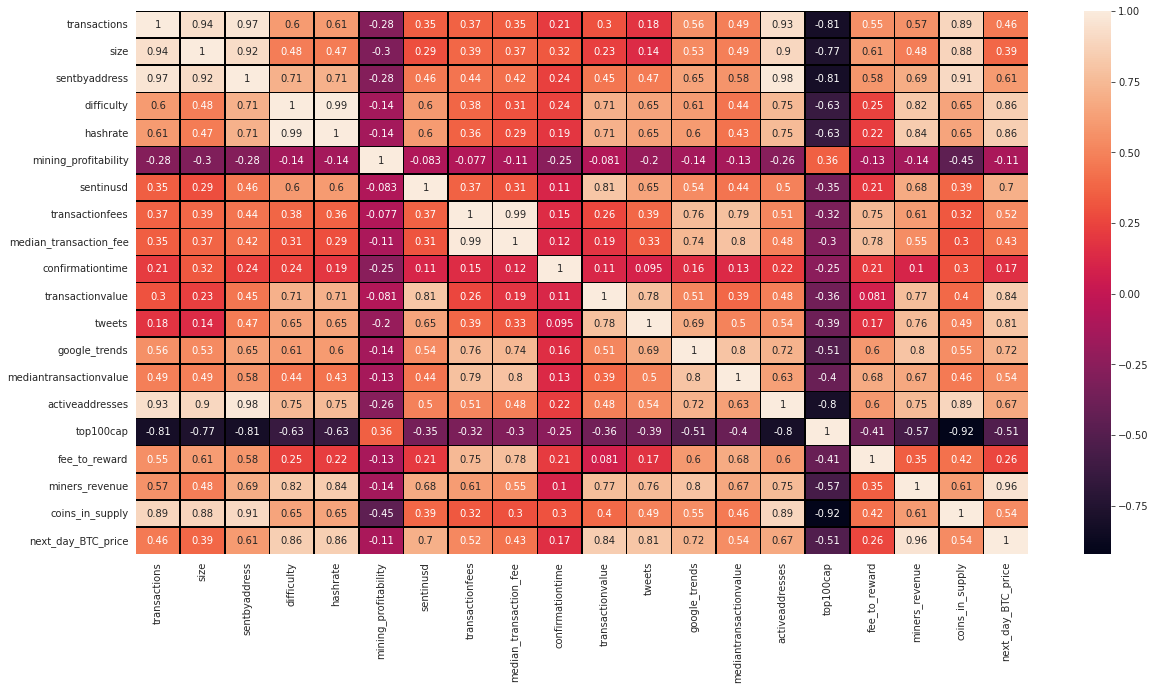

In [121]:
# correlation plot
plt.figure(figsize=(20,10))
data = data_raw_24.copy()
data.drop(['avg_price','Open','Close','High','Low'],axis=1,inplace=True)
cor = data[list(data.columns)].corr(method= 'pearson')
sns.heatmap(cor,annot=True,linecolor='black',linewidths=0.5)
plt.show()

Observations:
1. hashrate and difficulty are highly correlated and almost have same correlations with other features.
2. Similarly median_transaction_fee and transaction_fee are highly correlated and almost have same correlations with other features.
3. Among all the variables miners revenue is well correlated with the target variable.
3. Features which are well correlated with other independent variables.
 
 (i) transactions with size, sentbyaddresses and active addresses

 (ii)  sentbyaddresses with activeaddresses, coins_in_supply, size, transactions

 (iii) Blocksize with transactions, sentbyaddresses


## Target Analysis

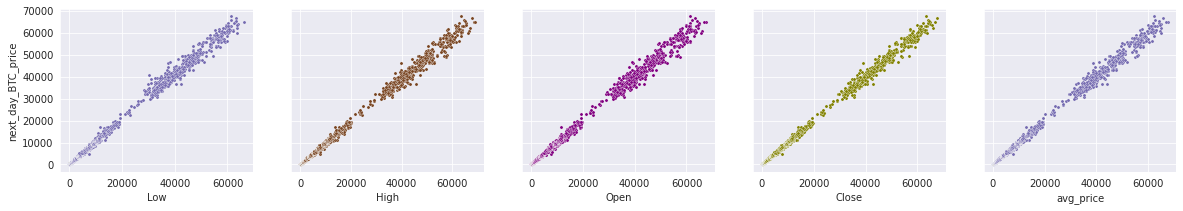

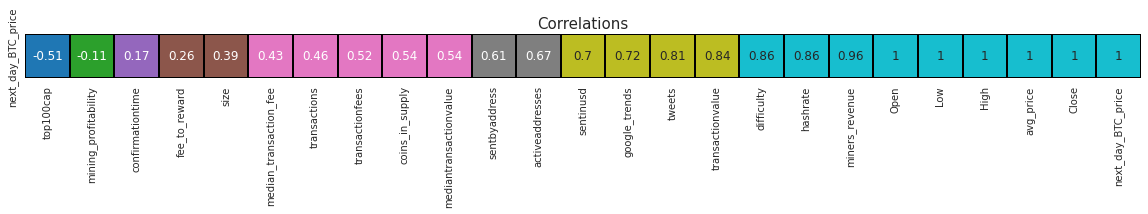

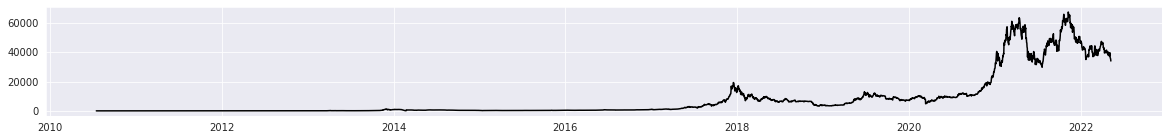

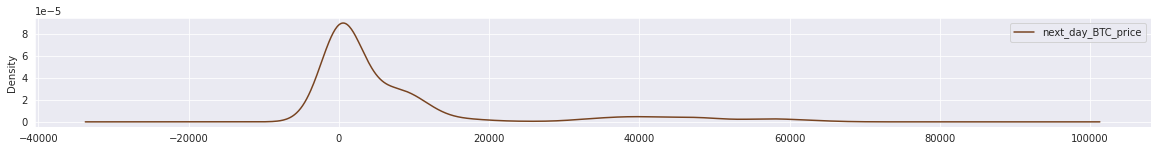

In [122]:
features = ['Low','High','Open','Close','avg_price']
fig, axes = plt.subplots(1, 5, figsize=(20, 3), sharey=True)    
sns.scatterplot(ax=axes[0],data=data_raw_24,x=features[0],y='next_day_BTC_price',s=10,color = colors[0])
sns.scatterplot(ax=axes[1],data=data_raw_24,x=features[1],y='next_day_BTC_price',s=10,color = colors[1])
sns.scatterplot(ax=axes[2],data=data_raw_24,x=features[2],y='next_day_BTC_price',s=10,color = colors[2])
sns.scatterplot(ax=axes[3],data=data_raw_24,x=features[3],y='next_day_BTC_price',s=10,color = colors[3])
sns.scatterplot(ax=axes[4],data=data_raw_24,x=features[4],y='next_day_BTC_price',s=10,color = colors[0])
plt.show()
plot(data_raw_24,['next_day_BTC_price'],3,3,2)
plt.show()
plt.plot(data_raw_24.index,data_raw_24['next_day_BTC_price'],color='black')
plt.show()
data_raw_24.plot(kind='kde',y='next_day_BTC_price',color=colors[1])

#### Observations:
1. Miners revenue is highly correlated with target variable followed by difficulty and hashrate.

## Number of BTC transactions per day

Bitcoin transactions are messages which are digitally signed using cryptography and sent to the entire Bitcoin network for verification.

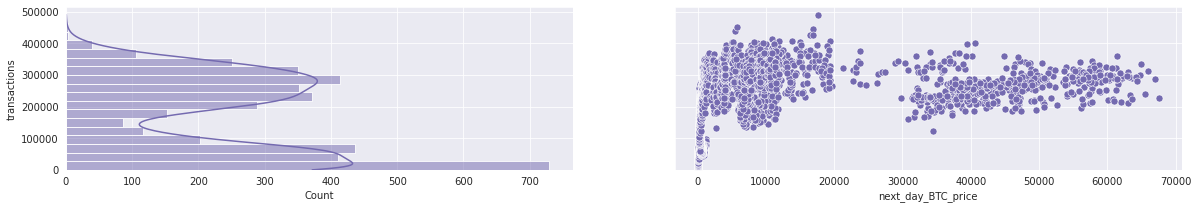

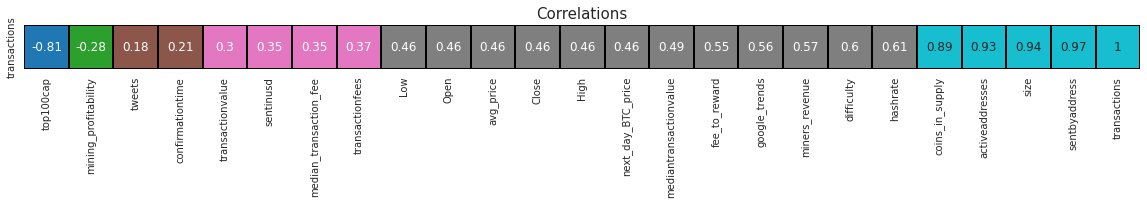

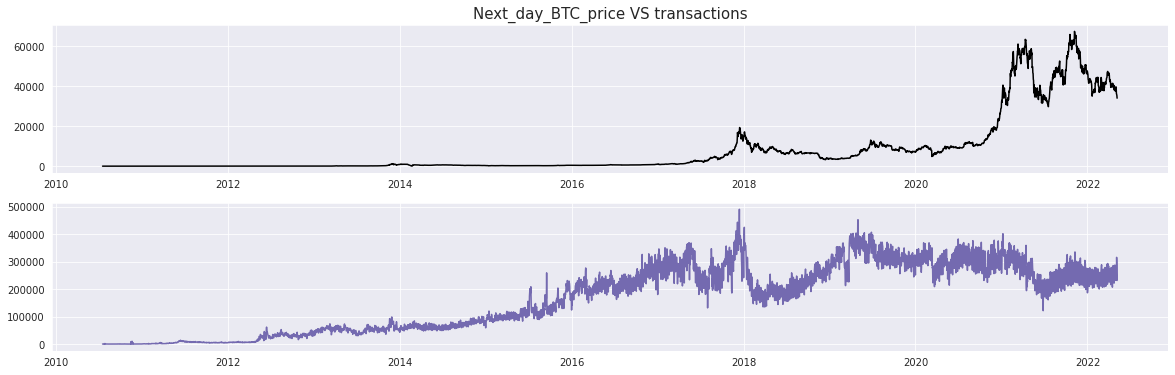

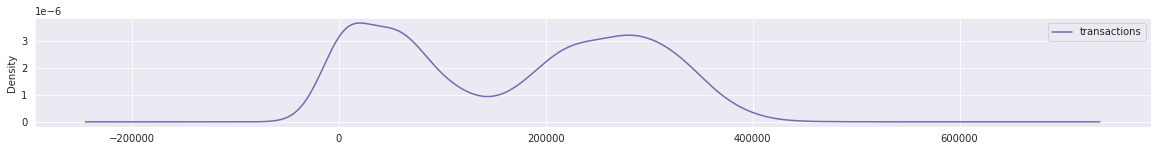

In [123]:
plot(data_raw_24,['transactions'],3,1,0)

#### Observations:
1. It is well correlated with features sent by address, size, active addresses and coins in supply. This is interpretable because with increase in number of transactions size of the block increases, supply increases and also more and more addresses will be in the network.
2. The low correlation value of it with target variable indicates, more transactions does not mean more will be the prices.

## Block Size

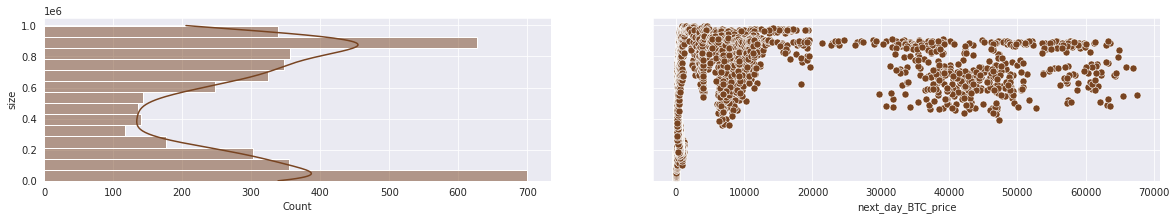

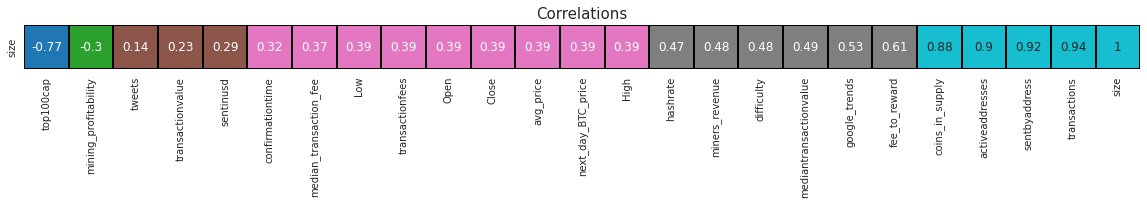

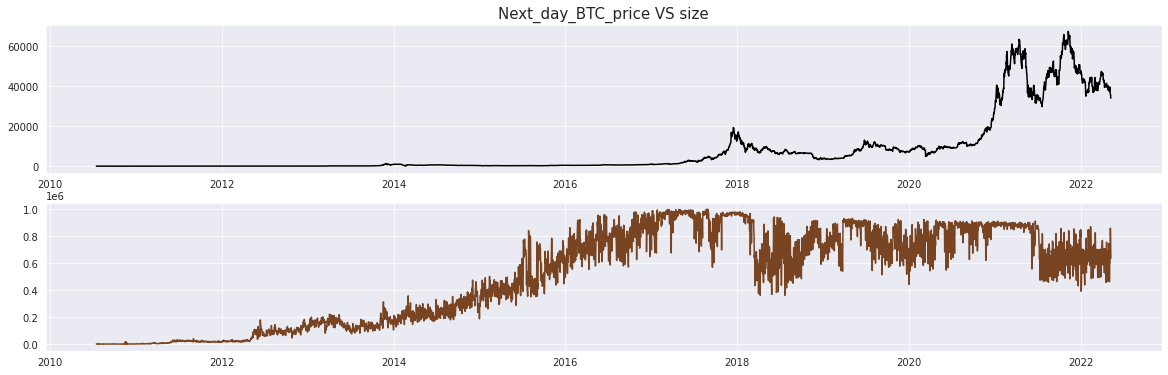

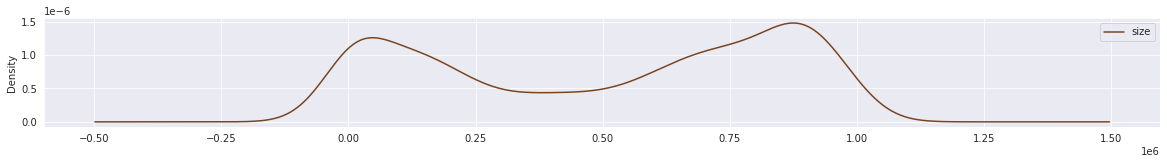

In [124]:
plot(data_raw_24,['size'],3,1,1)

## Sent by addresses & Active addresses

A Bitcoin address is a unique identifier that serves as a virtual location where the cryptocurrency can be sent.
Sentbyaddresses are addresses from which payments are made, while Active addresses are all the unique addresses that are involved in the transaction i.e.both to and from addresses.

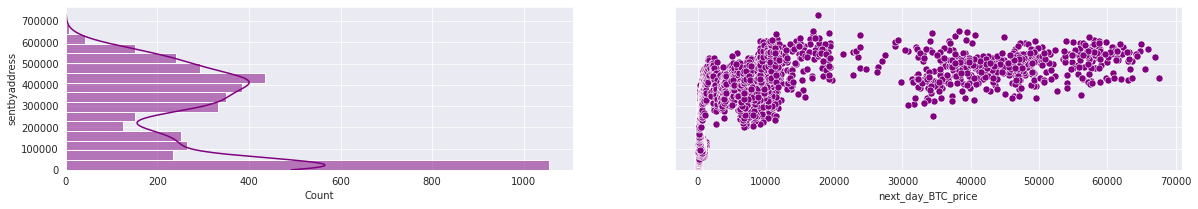

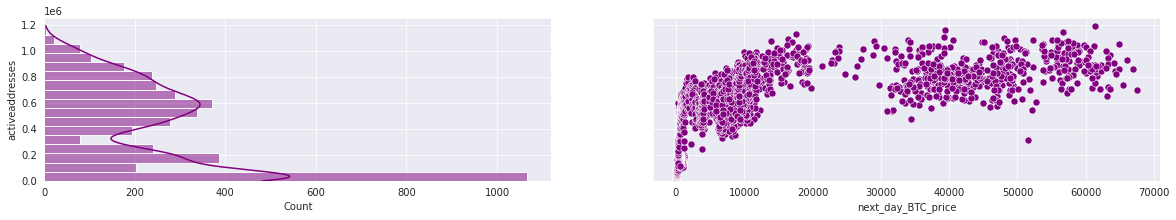

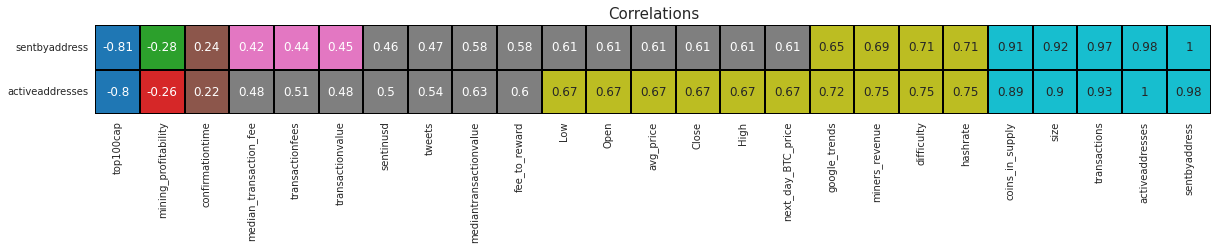

In [125]:
plot(data_raw_24,['sentbyaddress','activeaddresses'],3,2,2)
plot(data_raw_24,['sentbyaddress','activeaddresses'],2,3,2)

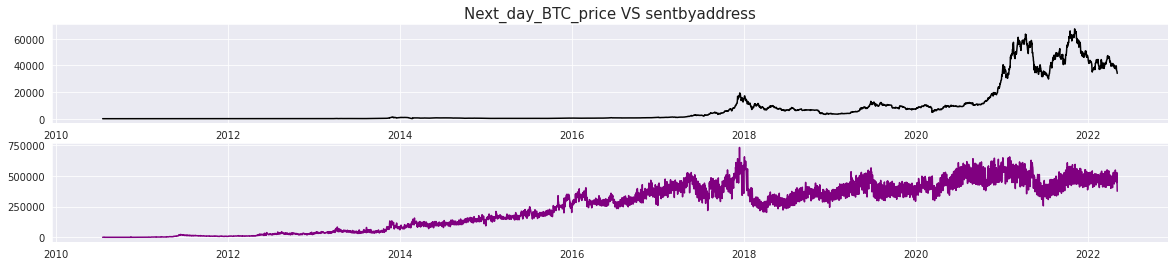

<Figure size 1440x216 with 0 Axes>

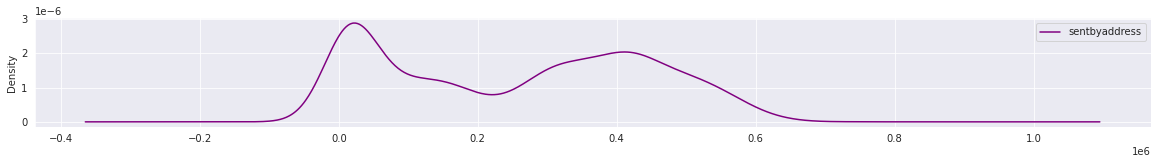

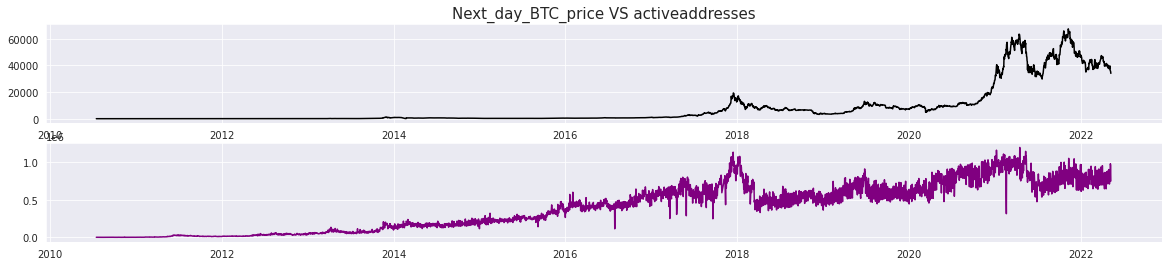

<Figure size 1440x216 with 0 Axes>

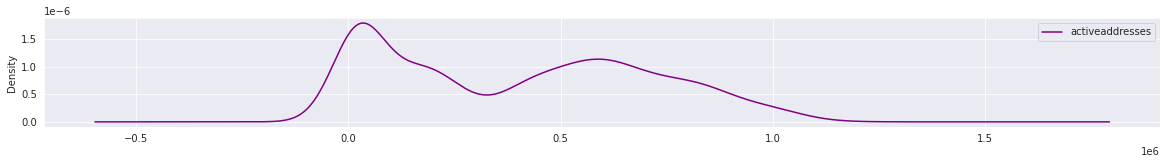

In [126]:
plot(data_raw_24,['sentbyaddress','activeaddresses'],2,4,2)

#### Observations:
1. Both are highly correlated, which is interpretable because both includes sent by addresses.
2. They are well correlated with transactions, size and coins in supply, which is again explainable. Because more the addresses involved, more the transactions, more coins in supply and more will be the block size.
3. Looking at the plots, active addresses is highly correlated in comparision to sent by addresses. The Reason could be active addresses is the combination of 'sent by' and 'received by' unique addresses.

## Top 100 Richest Adresses to coins

It is the percentage of top 100 addresses to Total Btc coins.


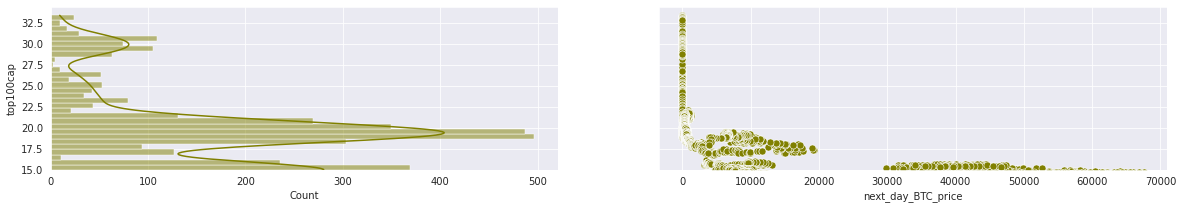

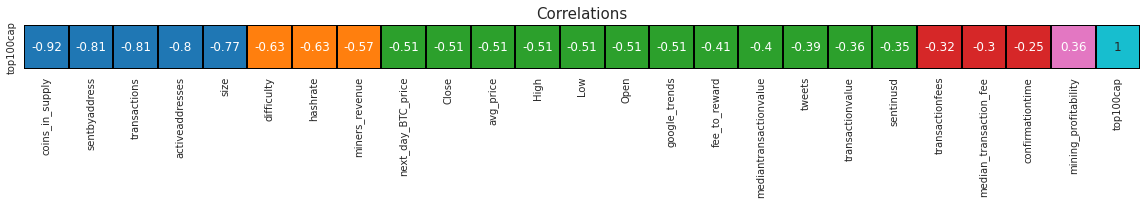

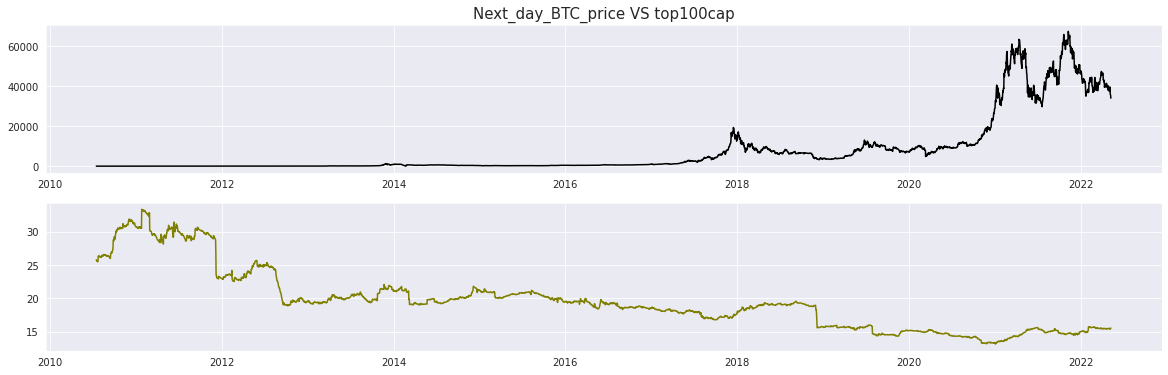

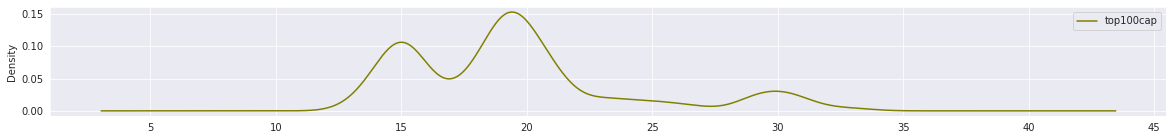

In [127]:
plot(data_raw_24,['top100cap'],3,1,3,(0,None),(15,None))

### Observations:
1. During the initial years the number of Bitcoins in supply are low and all the transactions used to happen through only few addresses that made them the richest addreddes. 
2. With time, number of transactions got increased, which made more blocks to get added to the blockchain network resulting in more btc coins into the circulation.
4. From the plot we can analyse how with increase in the coins i.e, denominator the percentage of richest addresses came down.
 

## Hashrate and Difficulty

The difficulty is a measure of how difficult it is to mine a Bitcoin block. Hashrate is a measure of processing power of the bitcoin network to mine a block. They both are interconnected. And more the values of difficulty and hashrate greater is the hashing power of the miners, security and also its resistance to attacks. 

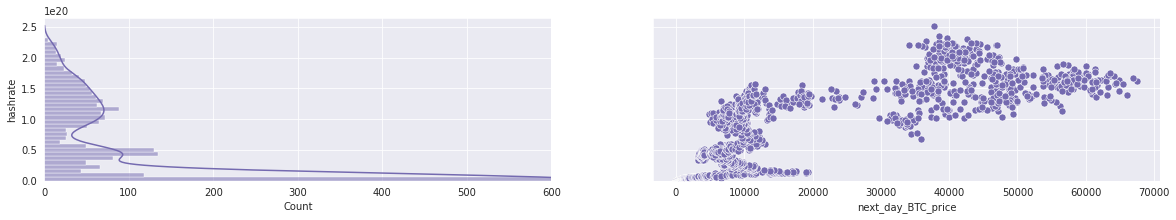

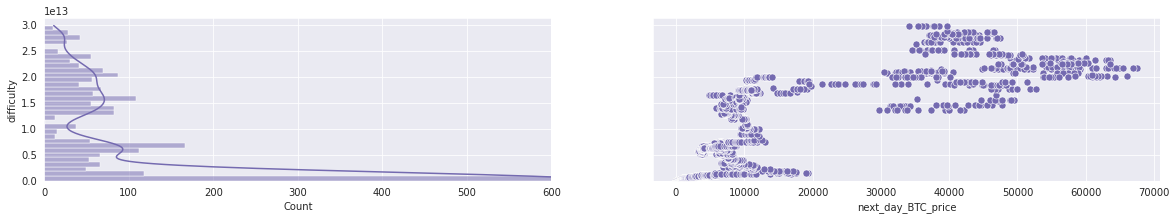

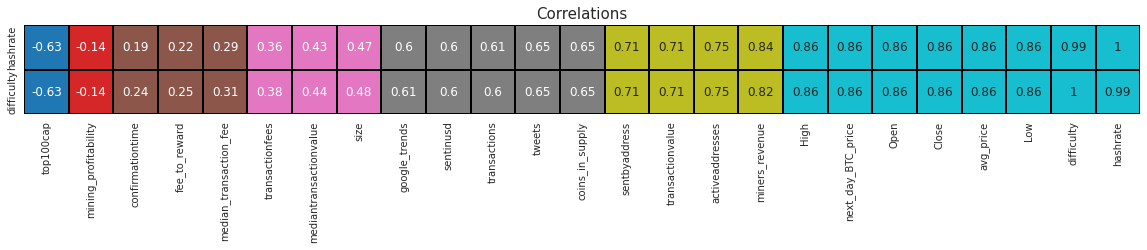

In [128]:
plot(data_raw_24,['hashrate','difficulty'],3,2,0,(0,600))
plot(data_raw_24,['hashrate','difficulty'],2,3,0)

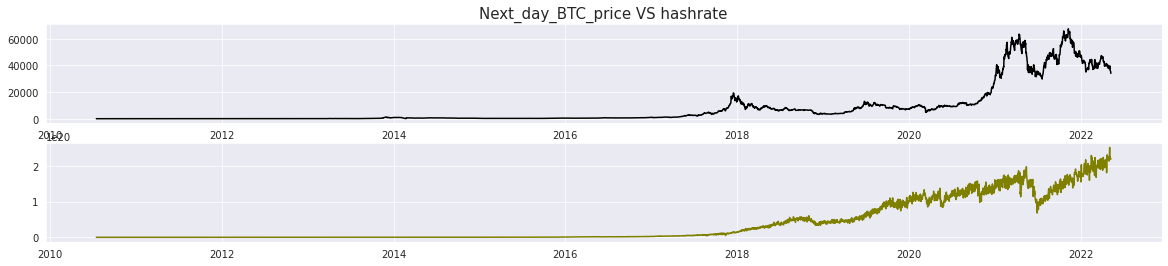

<Figure size 1440x216 with 0 Axes>

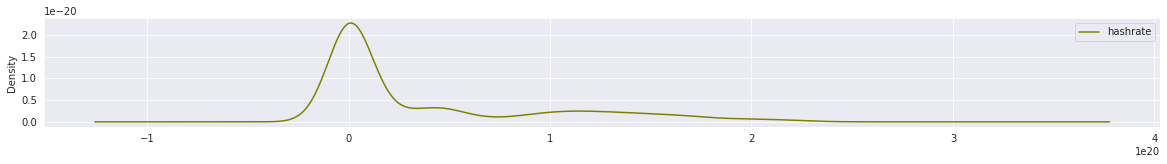

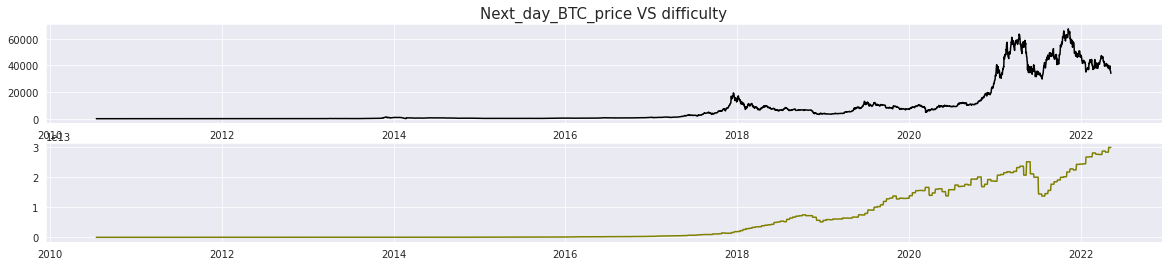

<Figure size 1440x216 with 0 Axes>

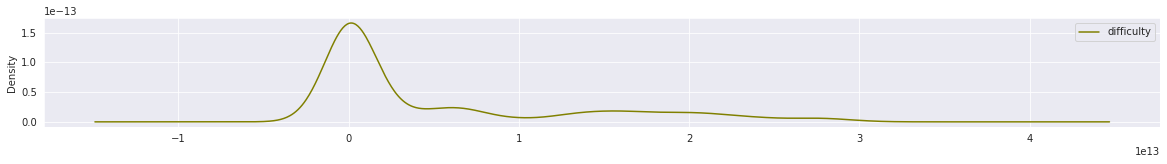

In [129]:
plot(data_raw_24,['hashrate','difficulty'],2,4,3)

#### Observations:
Difficulty and hashrate are highly correlated with each other and also with the target variable. The reason is the sudden inflation in the popularity of the bitcoins, which increased the complexity of the network that requires high hashing power.

## Mining profitability

Miners can profit if the price of bitcoins exceeds the cost to mine them. But with the increase in the popularity of the bitcoins, number of transactions increased, which makes the problem more complexity. It costs a lot to solve such complex problem.

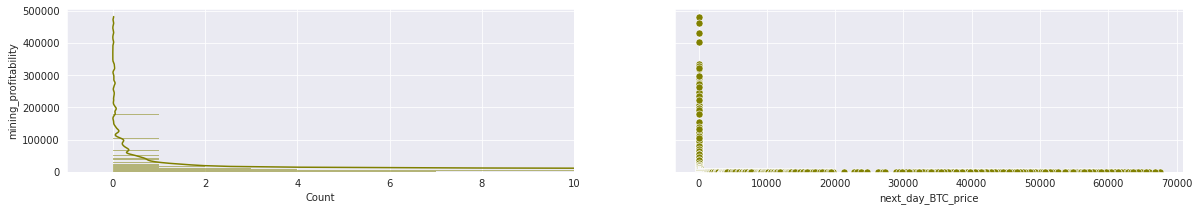

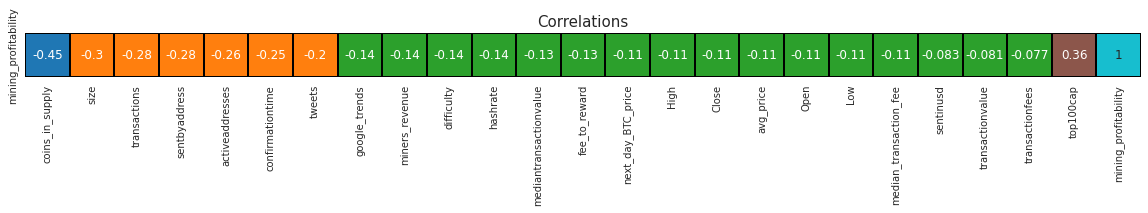

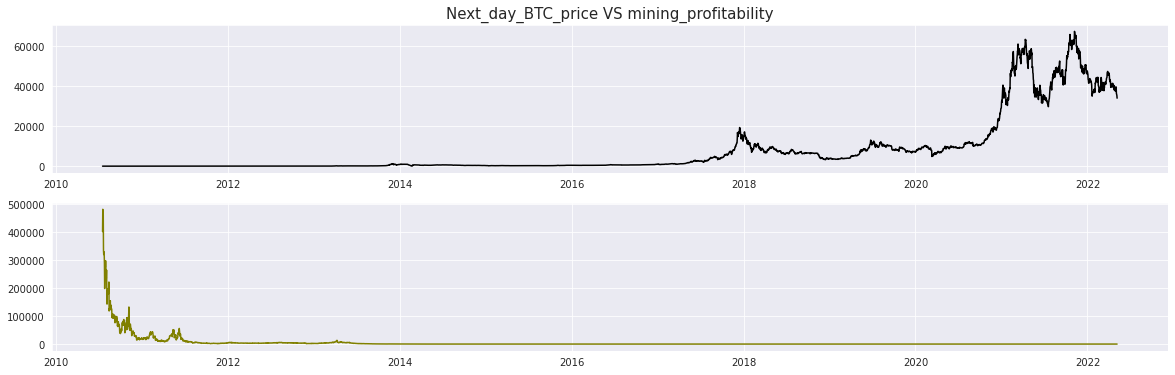

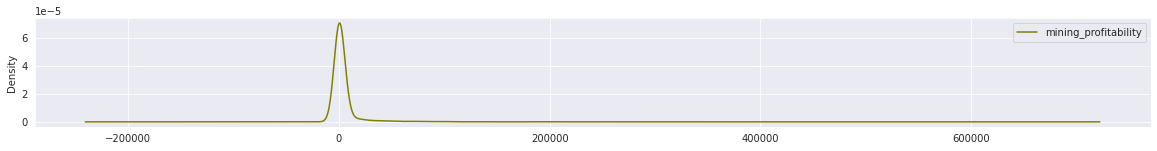

In [130]:
plot(data_raw_24,['mining_profitability'],3,1,3,(-1,10))

#### Observations:
1. It is highly peeked and positively skewed.
2. With time mining profitability is only expected to decrease as more and more transactions bound to happen.
3. It has very badly correlated with target variable and also with other independent variables. Hence, it is not that useful for making predictions.


## Sent Coins in USD

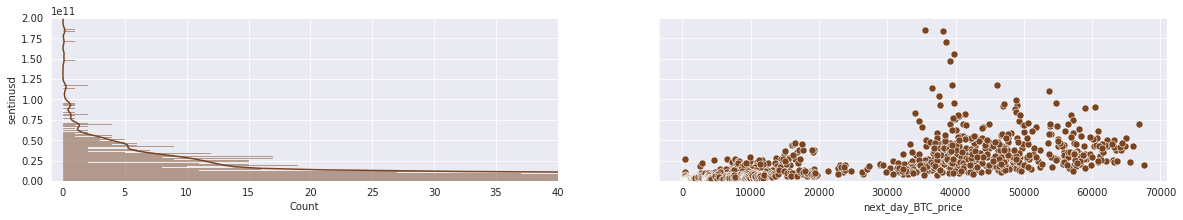

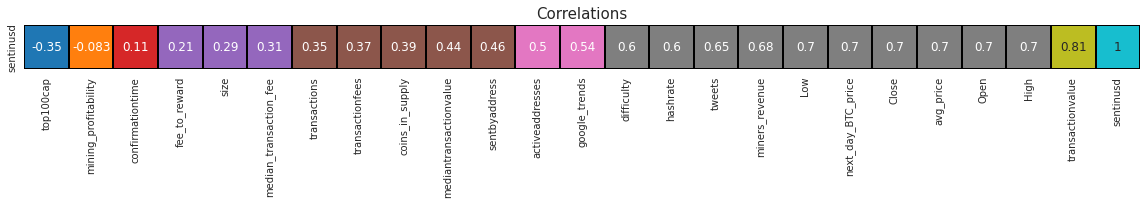

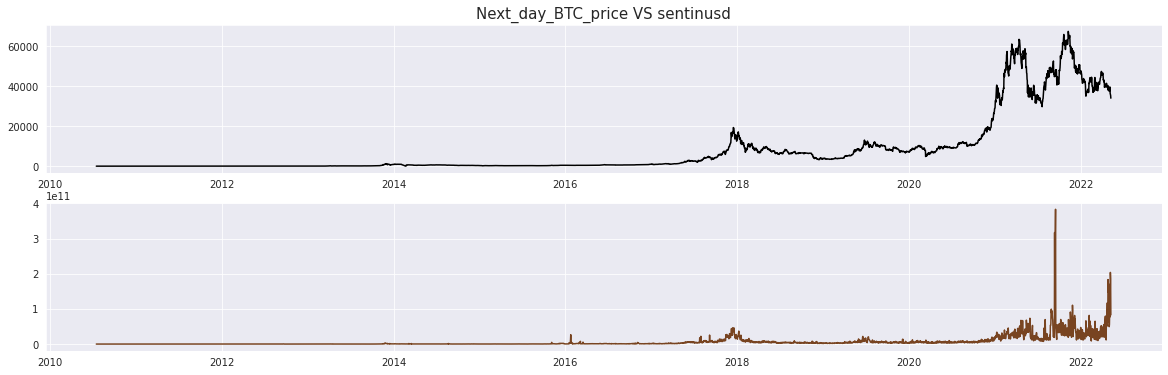

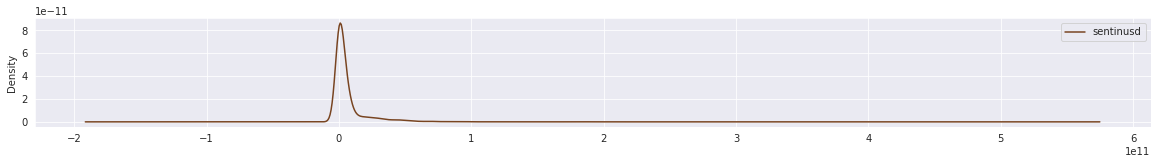

In [131]:
plot(data_raw_24,['sentinusd'],3,1,1,(-1,40),(0,2*10**11))

#### Observations:
1. It has comparatively high correlation with transaction value and also good correlation with target variable.
2. Positively skewed with highly peeked distribution.

## Average & Median Transaction fees

Transaction fee is the amount that is paid to the miners for verifying a transaction. The value is determined by supply and demand, just like anything else that people want. Where there is demand to process the transaction faster, there the fee will be higher. 

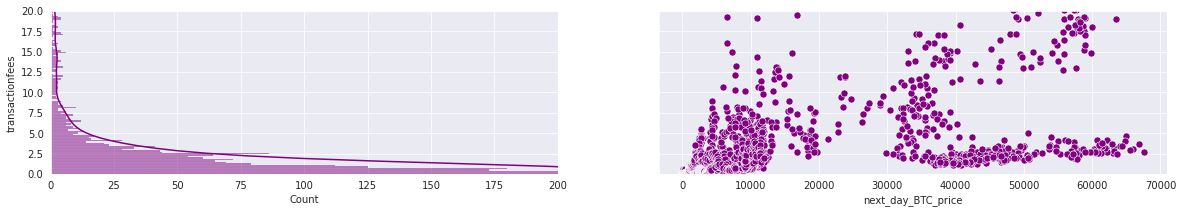

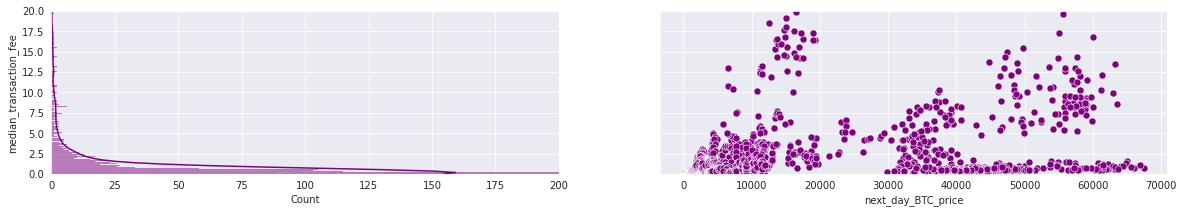

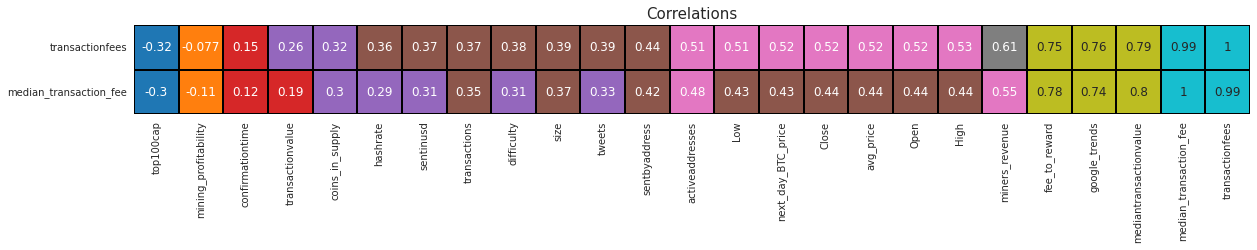

In [132]:
plot(data_raw_24,['transactionfees','median_transaction_fee'],3,2,2,(0,200),(0,20))
plot(data_raw_24,['transactionfees','median_transaction_fee'],2,3,2)

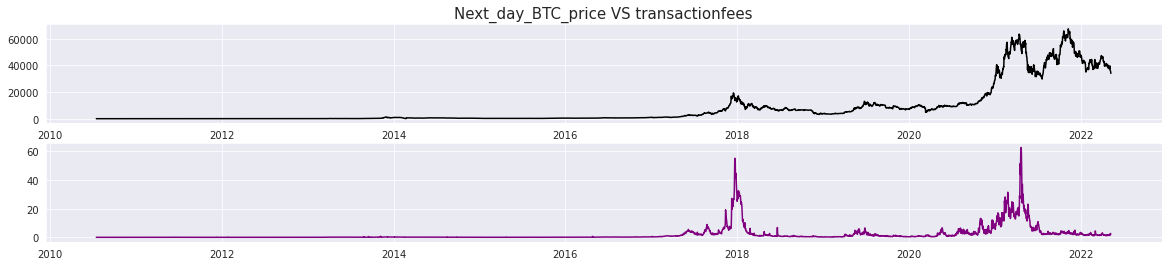

<Figure size 1440x216 with 0 Axes>

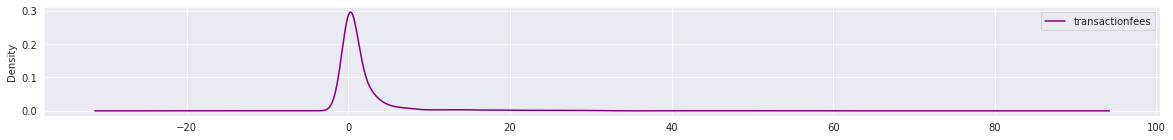

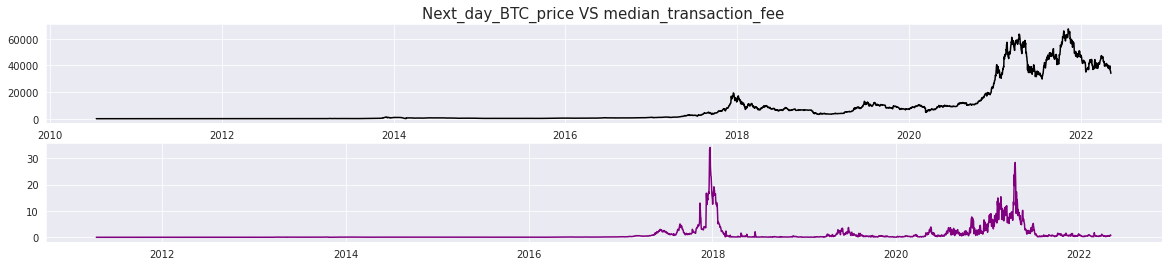

<Figure size 1440x216 with 0 Axes>

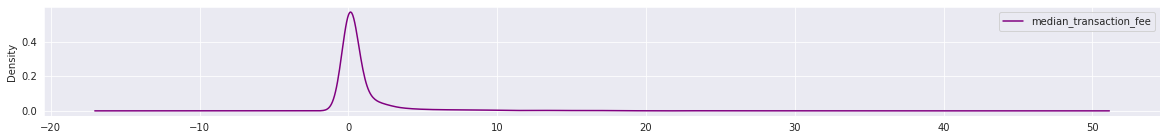

In [133]:
plot(data_raw_24,['transactionfees','median_transaction_fee'],2,4,2)

#### Observations:
1.The average transaction fee and median transaction fee are highly correlated with each other.

2.The average transaction fee has a comparatively high correlation with the target variable. This is explainable because averages can get affected by sudden inflations while medians cannot.

3. Right skewed and highly peeked distributions

## Transaction fee to Reward ratio

It is the percentage of average transaction fee in the total bitcoin rewards

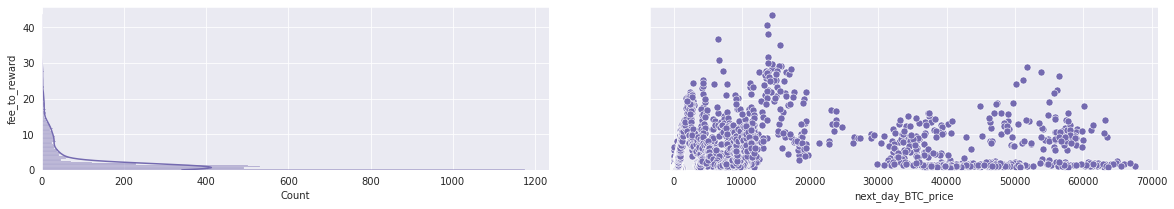

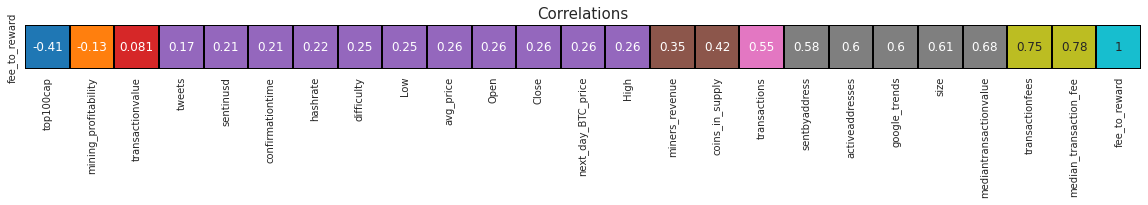

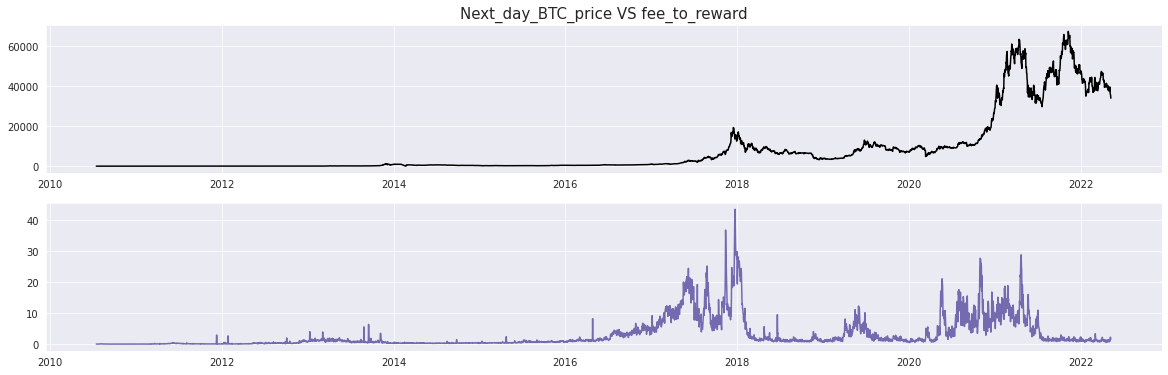

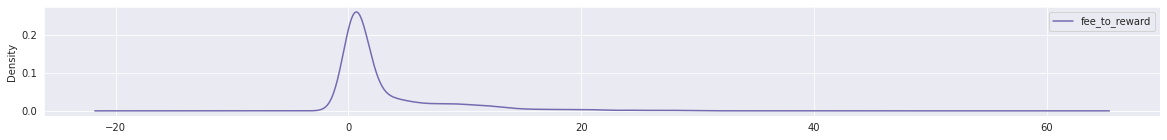

In [134]:
plot(data_raw_24,['fee_to_reward'],3,1,0)

### Observations:
1. It has some correlation with features transaction_fee and median_trasaction fee which is explainable.
2. Bitcoin rewards tend to reduce every 4 years by half and transaction fee is maximum only when their is sudden inflation in the BTC prices. But that doesn't mean transaction fee inceases with increase in the btc prices. Eventhough prices are higher, transaction fee is low compared to earlier years.
3. This indicates both bitcoin rewards and transaction fee are decreasing year by year.
4. Coming to fee_to_reward ratio, decrease in rewards value is more compared to decrease in transaction fee, this indicates overall ratio could increase every 4 years relatively.

## Average Block Confirmation time

It is the time taken by miners to solve complex mathematical problem in the block to generate a new block. Bitcoin tries to maintain its block time to be around 10 minutes with its complex algorithm, but it can slighly fluctuate depending on factors like difficulty and hashrate per sec.

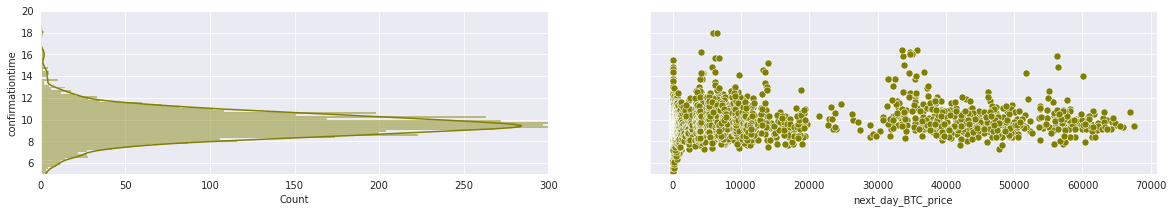

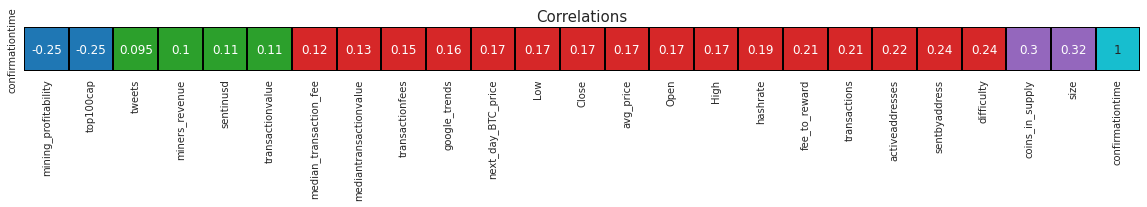

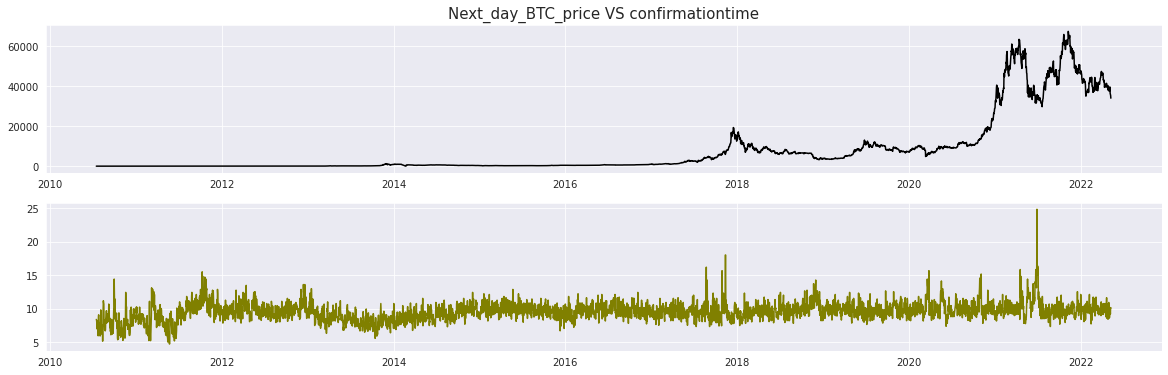

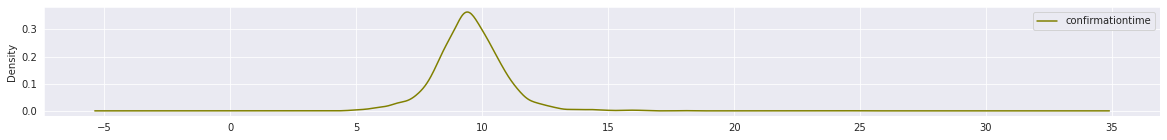

In [135]:
plot(data_raw_24,['confirmationtime'],3,1,3,(0,300),(5,20))

#### Observations:
1. A symmetrical distribution with mean 10 is expected here, as there is not much variance in the observations and also most of the time it is equal to 10.
2. It has comparatively high correlation with difficlty, block size and active addresses but low correlation with target variable.

## Average and Median Transaction values

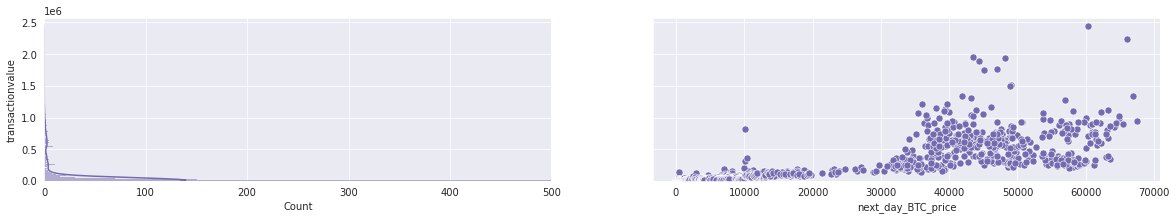

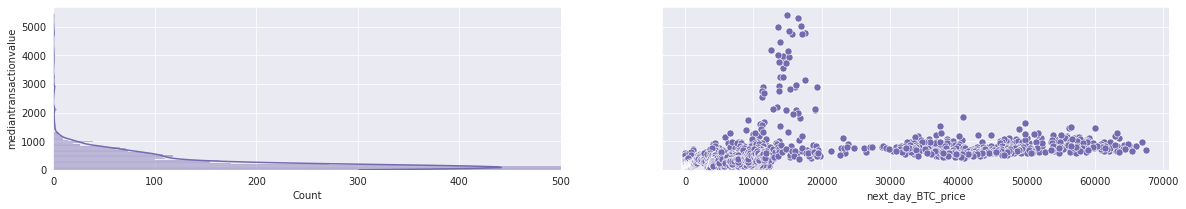

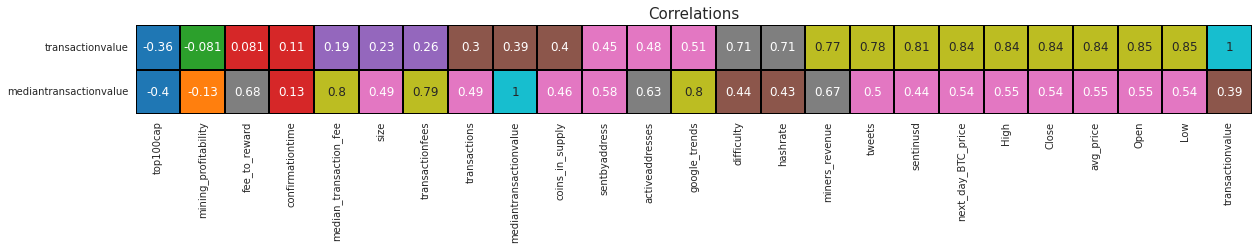

In [136]:
plot(data_raw_24,['transactionvalue','mediantransactionvalue'],3,2,0,(0,500))
plot(data_raw_24,['transactionvalue','mediantransactionvalue'],2,3,0)

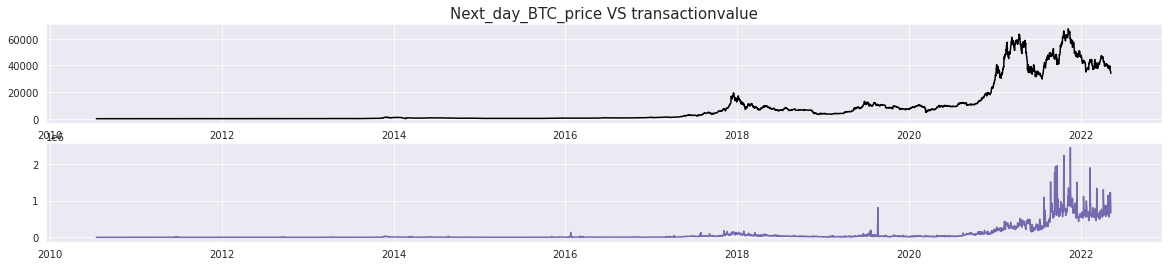

<Figure size 1440x216 with 0 Axes>

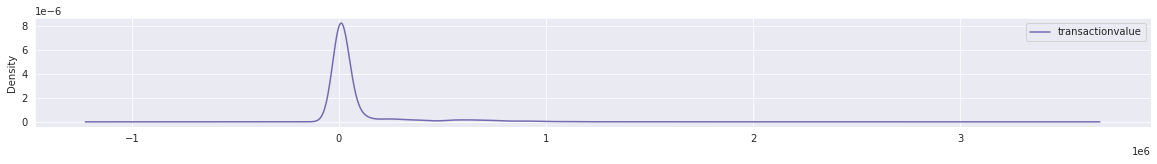

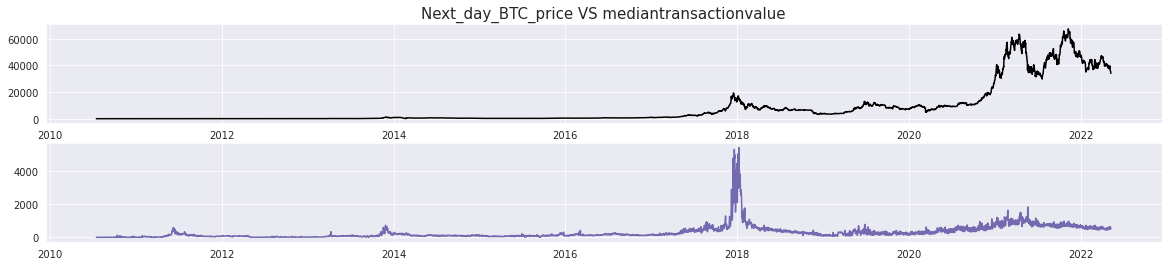

<Figure size 1440x216 with 0 Axes>

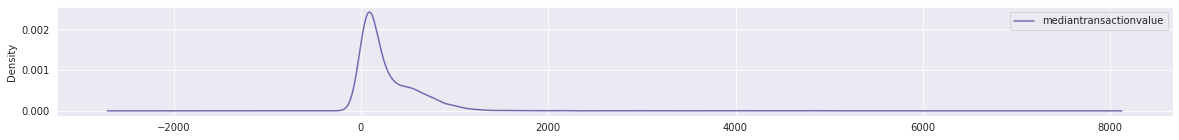

In [137]:
plot(data_raw_24,['transactionvalue','mediantransactionvalue'],2,4,0)

### Observations:

1. There should be a good correlation between average and median transaction values, like in case of average and median transaction fees, but here they are not well correlated.
2. One of the reasons could be the presence of outliers. Median may not get effected by the outliers but, average mean will. 
3. But in our case, with price volatality, those outliers could be genuine. Median basically won't get effected by such fluctuations even though the transaction values are genuine. 
4. This is the reason why average transaction value has high correlation with target variable compared to median transaction value.

## Google trends and Twitter trends

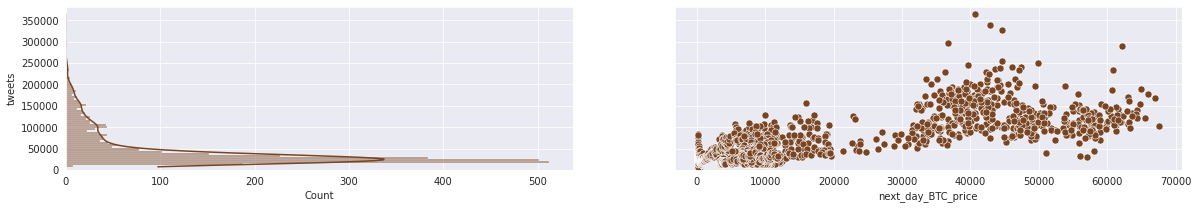

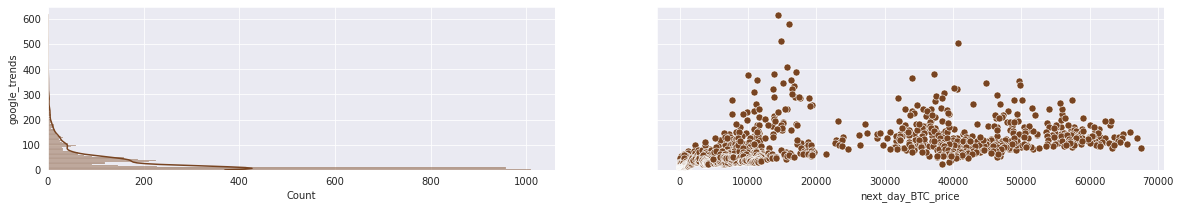

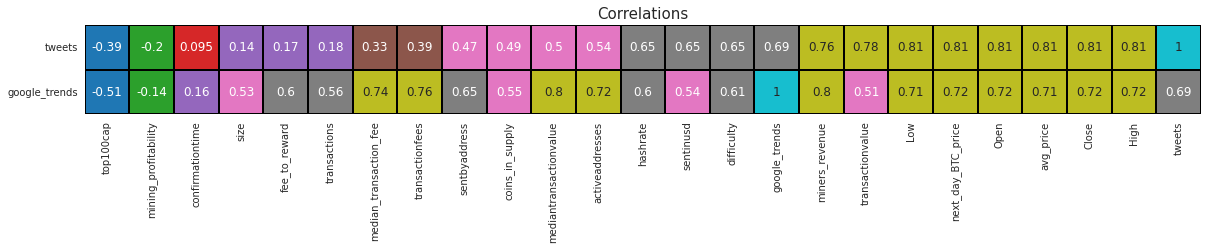

In [138]:
plot(data_raw_24,['tweets', 'google_trends'],3,2,1)
plot(data_raw_24,['tweets', 'google_trends'],2,3,1)

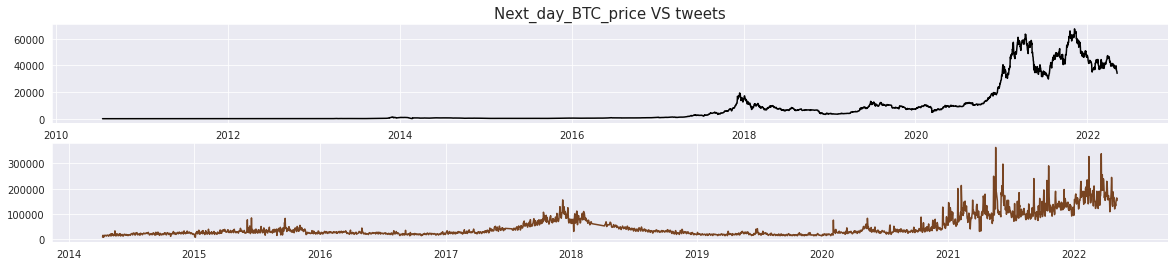

<Figure size 1440x216 with 0 Axes>

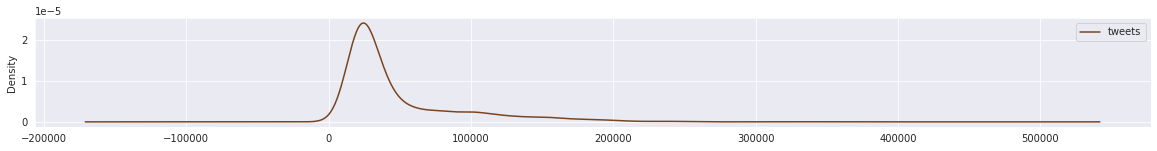

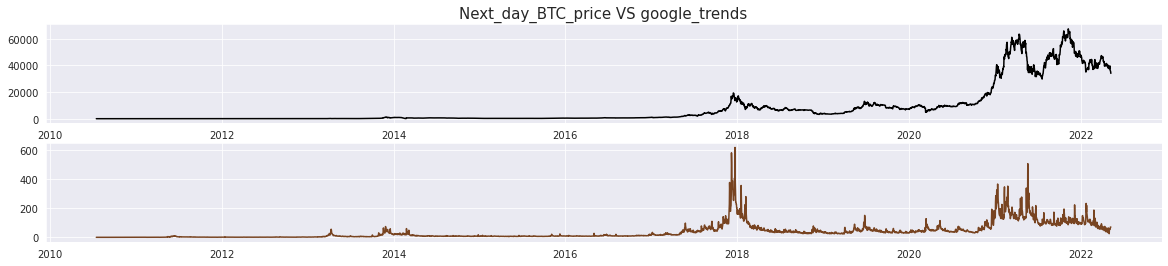

<Figure size 1440x216 with 0 Axes>

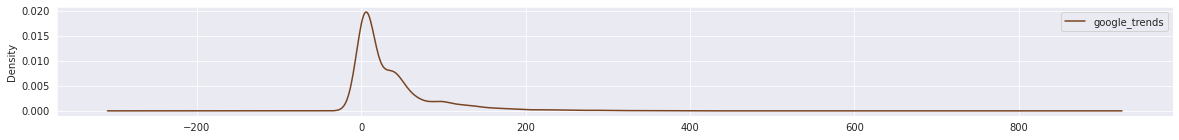

In [139]:
plot(data_raw_24,['tweets', 'google_trends'],2,4,1)

#### Observations:
1. From the past few years, social media trends playing a vital role in the rise or fall of the cryptocurrency prices.
2. It is one of the factors which could influence investors, along with other economical factors to buy or sell.
3. People tend to panic sell or greed purchase based on these trends.
4. Number of trends per day can be either positive or negative. Hence we can't say more the trends more will be the prices.If we can know the number of positive trends among the total trends, that could be a very useful feature.
5. Though Number of trends could effect the btc prices, they may not be that useful in prediction as we don't know how many of them are positive. But still they both seem to have a good correlation with target variable.

## Miners revenue

Miners who successfully validate a block will earn rewards, which is paid in Bitcoins, for verifying a block of Bitcoin transactions. Miners will also earn transaction fees from all the transactions in a block.

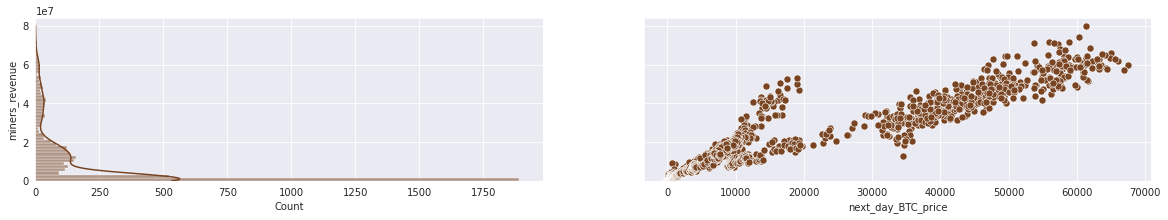

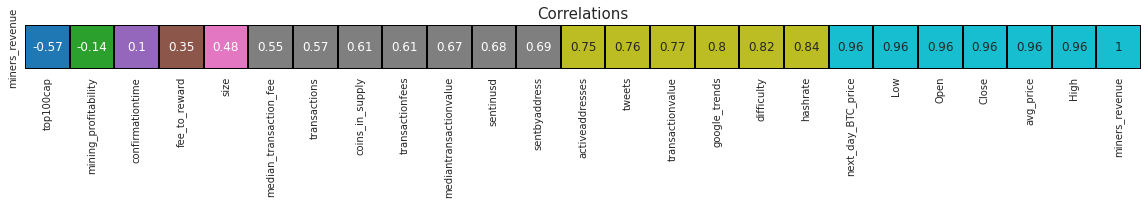

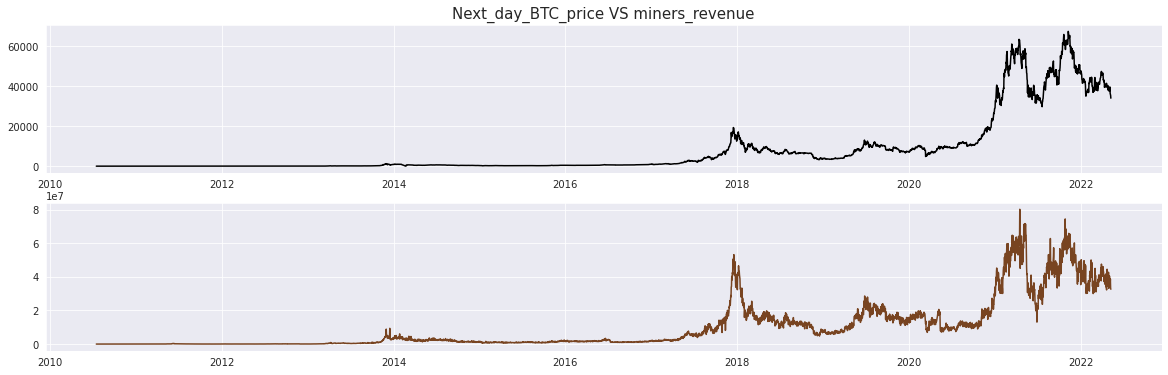

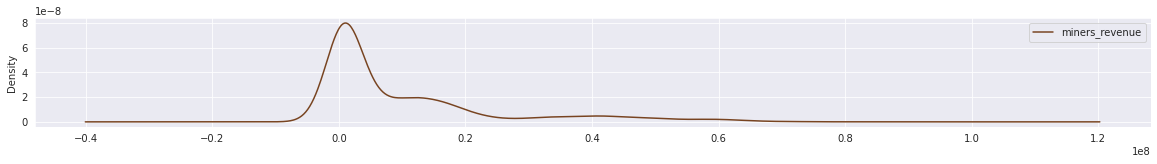

In [140]:
plot(data_raw_24,['miners_revenue'],3,1,1)

#### Observations:
1. Among all the features it has the highest correlation with target variable.
2. High Miners revenue indicates, that more blocks are in blockchain network, more circulating supply and more transactions happening per day.
3. Increase in supply and number of transactions results in the rise of the prices.

## Coins in Circulation

Total number of Bitcoins that are in circulation. Bitcoin supply cap of 21 million was set to ensure a currency without inflation. Around 90% of the bitcoins were already in circulation.

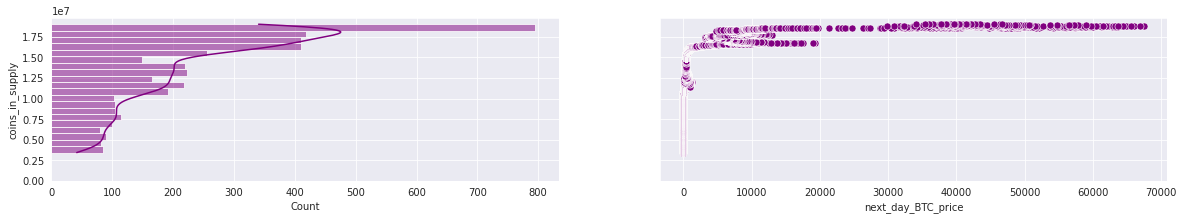

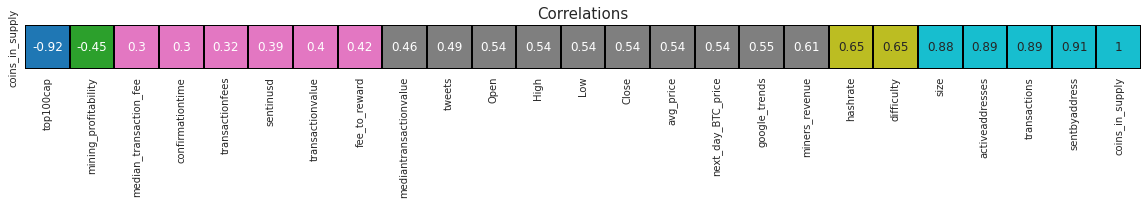

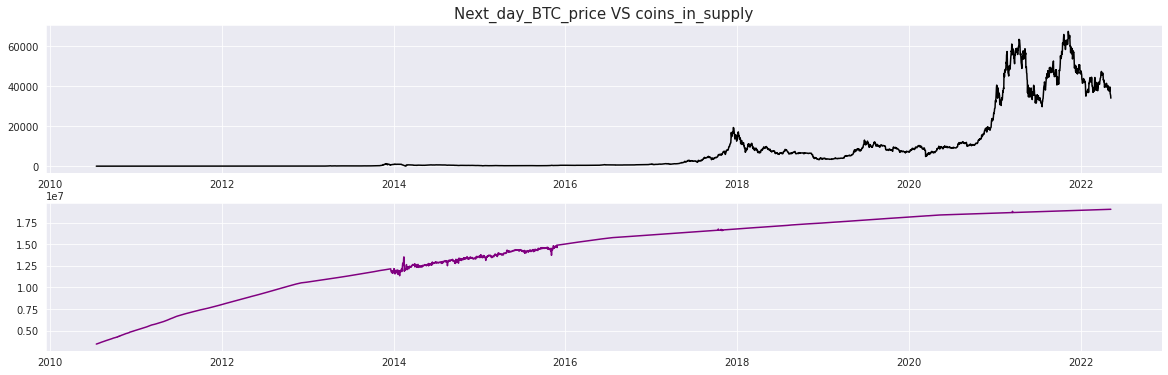

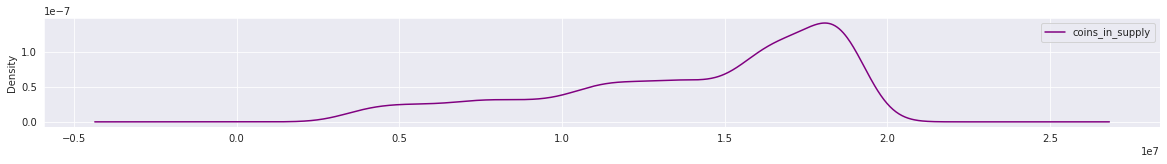

In [141]:
plot(data_raw_24,['coins_in_supply'],3,1,2)

#### Observations:
1. Bitcoin prices depend on the circulating supply of the coins. 
2. With already 90% of the coins been mined, demand for the bitcoins is higher than the supply that could result in the rise of the prices.

## Fear and Gear index

It is a sentiment index. The crypto market behaviour is very much dependent on people sentiments. they tend to get greedy when the market is rising and buys in the Fear of missing out. At the same people often sell their coins when market value is falling out. This index includes various economical and social factors like Volatality, Market volume, Social Media, Surveys, Dominance and trends.

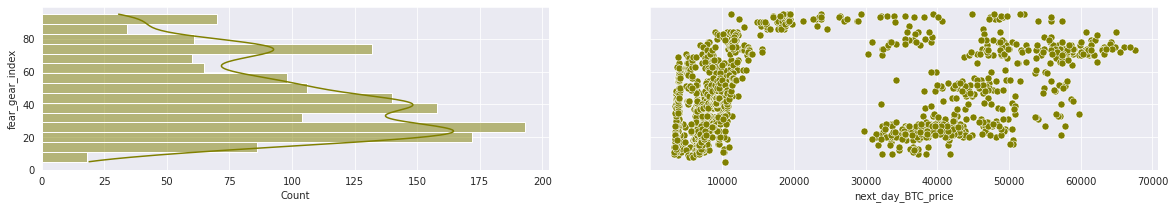

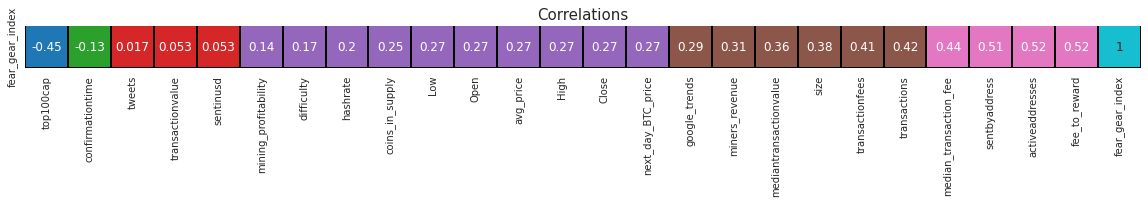

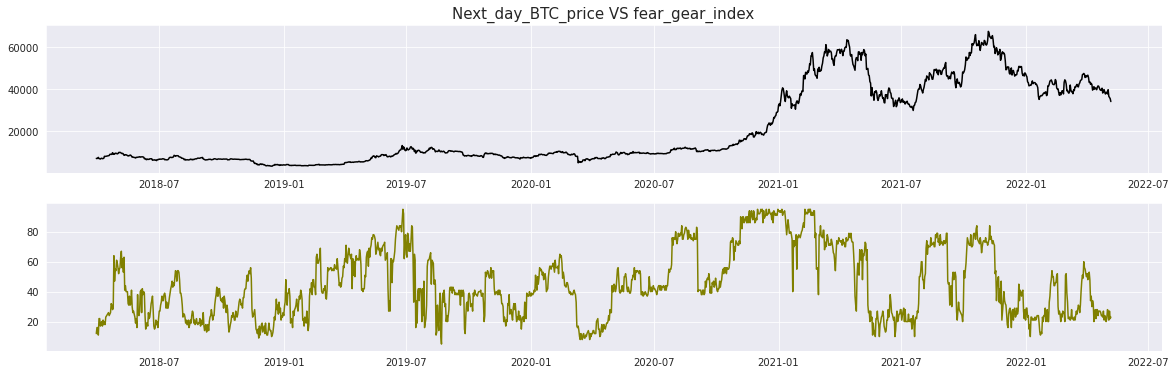

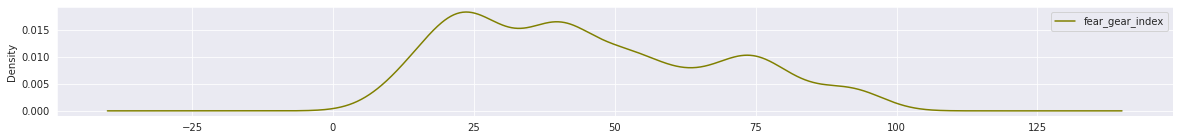

In [142]:
plot(data_raw_25,['fear_gear_index'],3,1,3)

#### Observations:
1. Index value 0 means Extreme Fear and 100 means Extreme Greed.
2. Data is available only from year 2018. It is expected to have a good correlation with target variable but we can clearly see from above plots that is not the case.
3. comparatively it has high correlation with fees and addresses related features.